In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis 
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import statistics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sb
import operator
import itertools

In [84]:
dataframe=pd.read_csv("C:/Users/Jivitesh Sharma/Desktop/Knight ML Assignment/Data/train.csv")
dataframe.info() 
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern ...,"Classic Chardonnay aromas of apple, pear and hay lead into a palat...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (WA)),This wine is near equal parts Syrah and Merlot with the balance Ca...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentration and soothing aroma...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (Bergerac Sec),It's impressive what a small addition of Sauvignon Gris and Muscad...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec (Vin de Liqueur),"This ripe, sweet wine is rich and full of dried and fresh fruit fl...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


Taking a look at the data, it was mostly filled with categorical variables so my inital though was to one hot encode a few categorical variables which i could then use for my data visualisation. But taking a closer look i realized it would not be meaninngfull to one hot encode any of the variables as such as their numeric representation would be of any benefit to the data analysis, thus the categorical varibales remain as they are.

In [29]:
#Encoded=pd.get_dummies(dataframe["variety"])
#Encoded_df=pd.concat([dataframe,Encoded],axis=1)
#Encoded_df
#plt.subplots(figsize=(30,30))
#sb.heatmap(Encoded_df.corr(),annot=True,cmap="coolwarm")

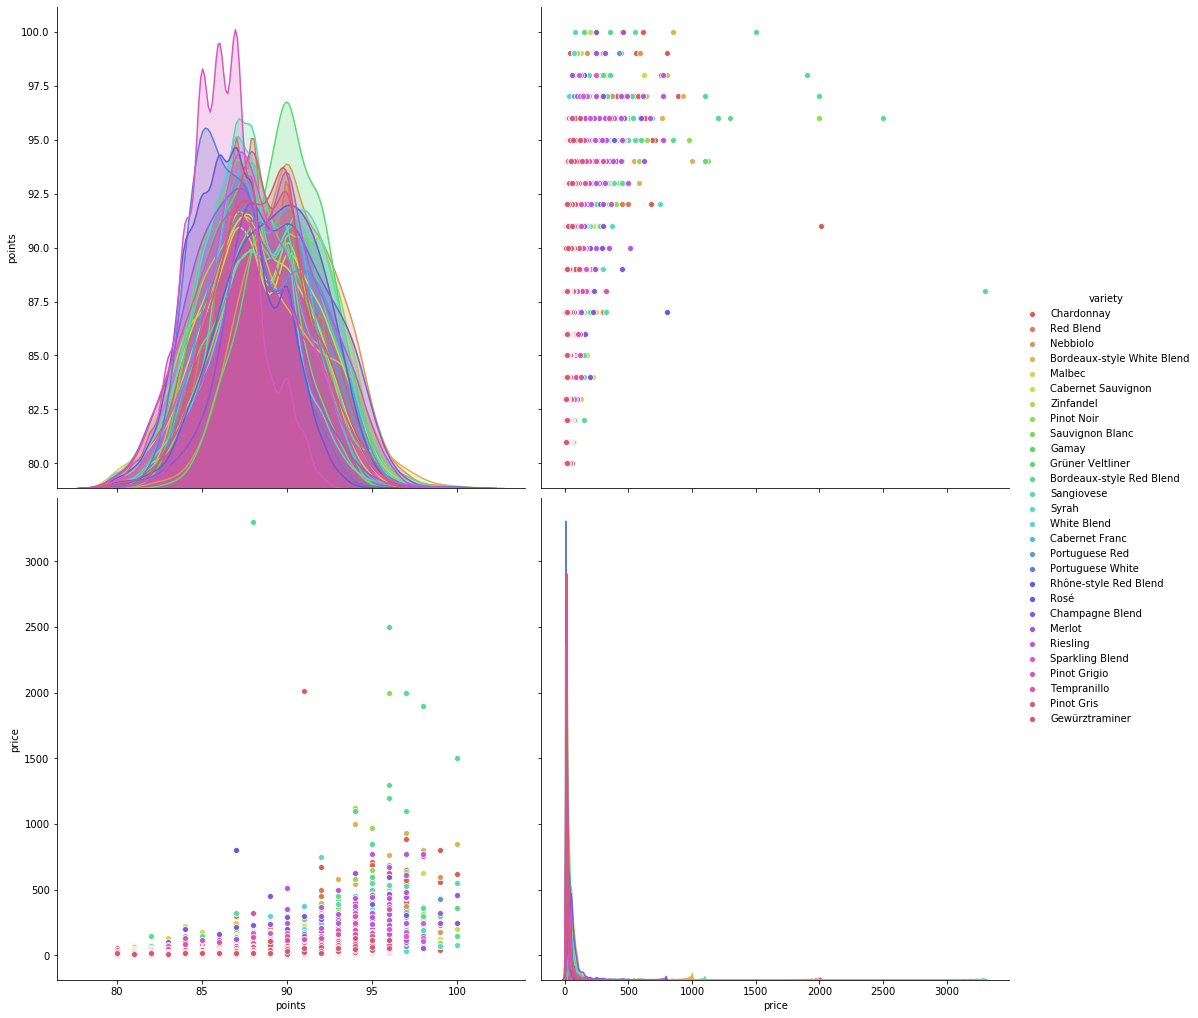

In [19]:
sb.pairplot(dataframe, hue="variety",palette="hls",height=7) 

I created a pair plot to visualise how the numerical data is distributed base don each vine variety, looking at the pairplot we see that the points for each wine are roughly normally distribute and the comaprison between points and price is negatively skewed

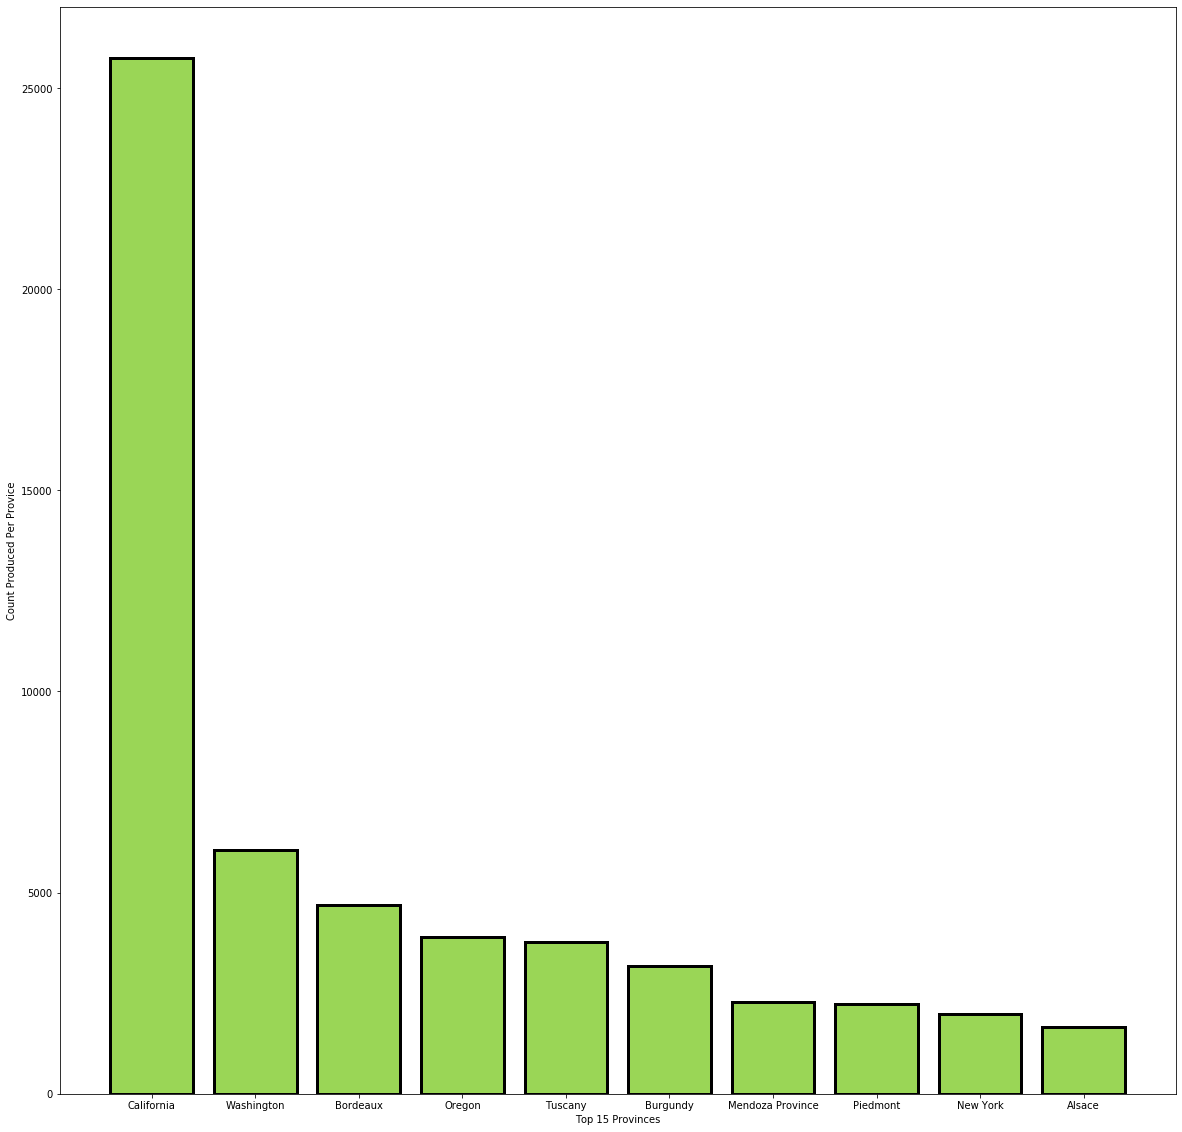

In [493]:
dataframe.province=dataframe.province.replace(np.nan,"na")
for province in(dataframe.province.dropna()):
    ProvinceCount[province]=0 

for i in ProvinceCount:
    ProvinceCount[i]= list(dataframe.province.dropna()).count(i) 

sorted_ProvinceCount = dict(sorted(ProvinceCount.items(), key=operator.itemgetter(1),reverse=True)) 
sorted_Top10=out = dict(itertools.islice(sorted_ProvinceCount.items(), 10))  

plt.figure(figsize=(20,20))
plt.bar(x=sorted_Top10.keys(),height=sorted_Top10.values(),color='#9ad656',edgecolor='#000000',linewidth=3)


plt.xlabel("Top 15 Provinces")
plt.ylabel("Count Produced Per Provice")
plt.show()


I firstly decided to look where the most wines were coming from, so I decided to plot out the top 15 provinces from where these wines are from, data like this can be used for various purposed such as- where to build new factories, the biggest competetive markets and even for investors who would like to invest in a growing and flourishing wine market.

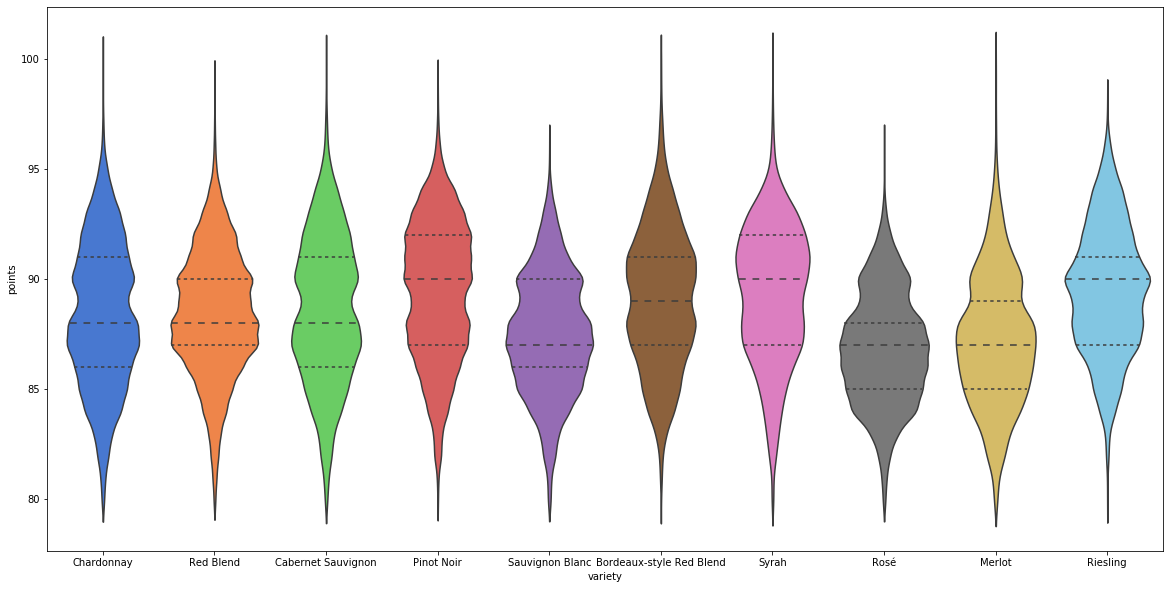

In [498]:
plt.figure(figsize=(20,10))
#dataframe.variety.value_counts()[:10].index
sb.violinplot(x='variety',y='points',palette="muted",saturation=1,inner="quartile",data=dataframe[dataframe.variety.isin(dataframe.variety.value_counts()[:10].index)])
#dataframe.head(10)


Next I created a violin plots of the top ten most mentioned wines, the figure or shape of the violins help to visualise the distribution of the counts of the wines,with the y-axis representing the poitns each wine got.I take a look at the quartiles and the median scores they achieved which is a better metric to look at when compared to the mean as it takes care of the outliers present in the data.

The dotted line on the upper end of the violin plot represents the upper quartile value,the line at the lower end representing the lower quartile and the line at the middle representing the median 

this visualisation can be used by companies to see which of their wines is scoring the highest points, and can also be helpful for wine connoiseurs who will be happy to see which wine is being mentioned frequently.

Text(0, 0.5, 'Count Of Reviews')

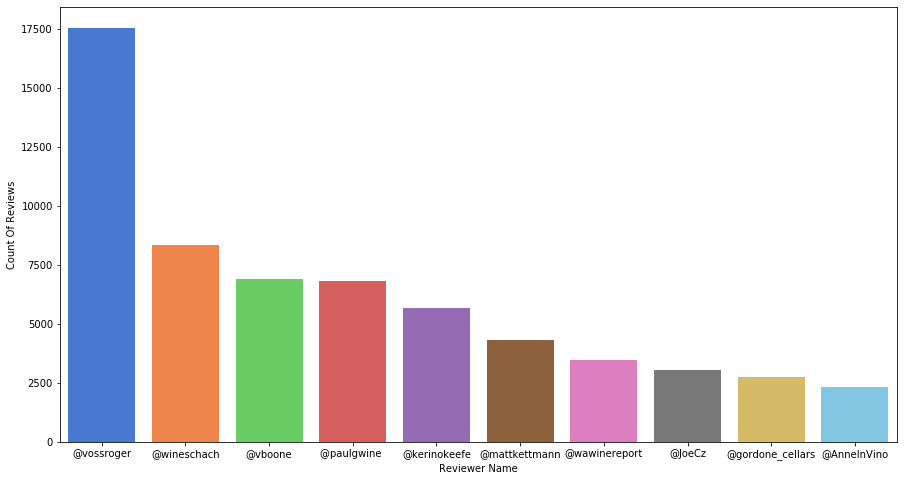

In [466]:
ReviewCount=dataframe.groupby('user_name').count()
Top10Reviewers=ReviewCount.sort_values(by=['review_title'],ascending=False).head(10)
Top10Reviewers
plt.figure(figsize=(15,8))
sb.barplot(x=Top10Reviewers.index,y=Top10Reviewers.review_title,palette="muted",saturation=1,)
plt.xlabel("Reviewer Name")
plt.ylabel("Count Of Reviews")

Next I thought of plotting the top 10 reviewers as to get a better idea of which user has reviewed the most number of wines. This data will probably help us look at the popularity of the wine reviewer and his or her credibility. 

<Figure size 720x720 with 0 Axes>

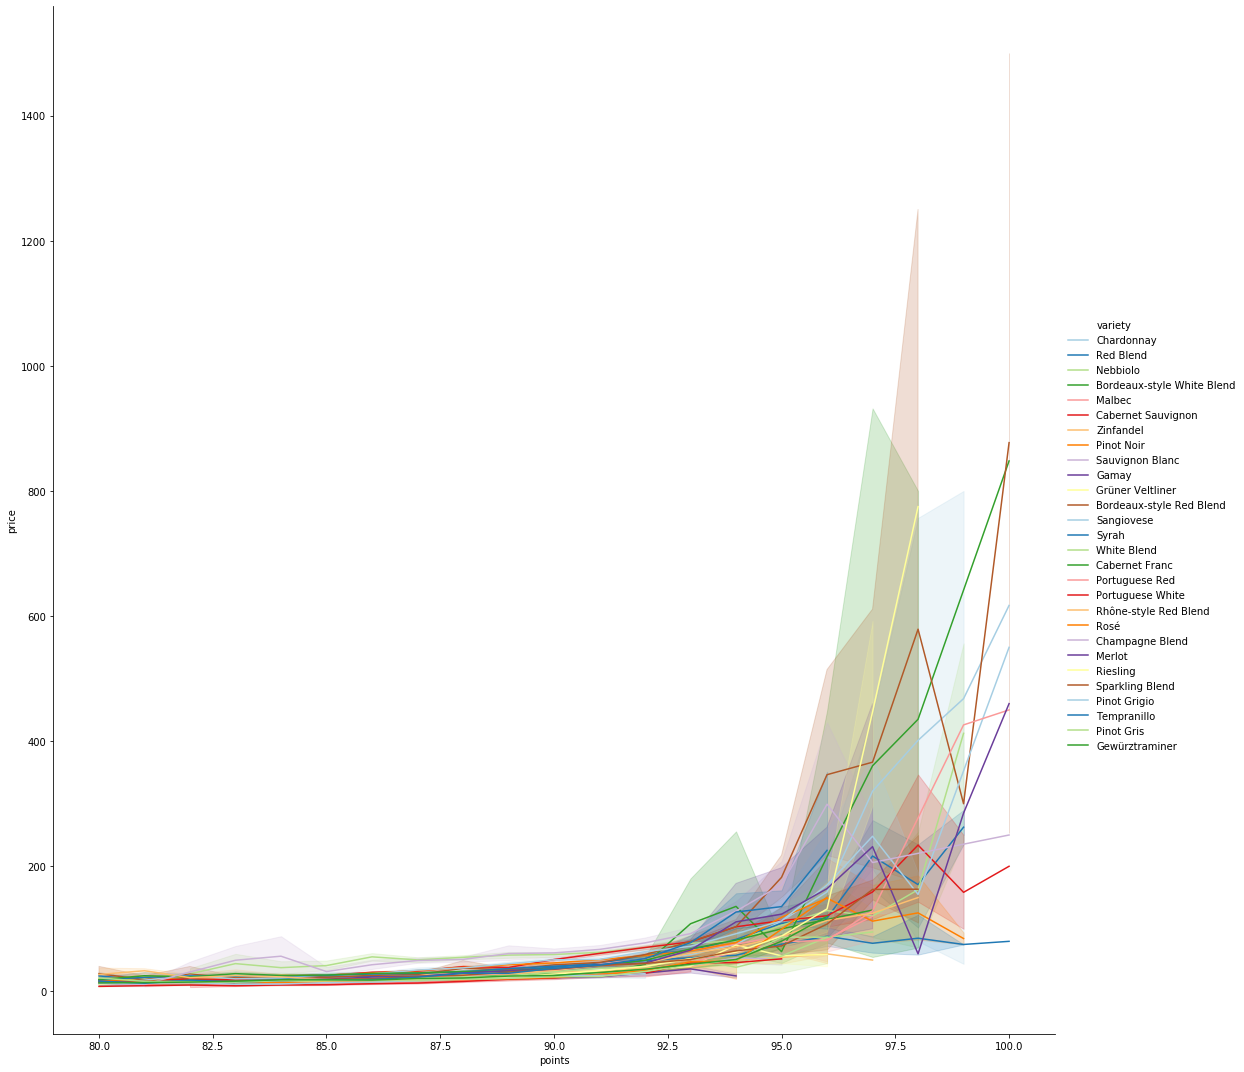

In [99]:
sb.relplot(x="points", y="price", hue="variety",kind="line",data=dataframe,alpha=1,height=15,palette="Paired")


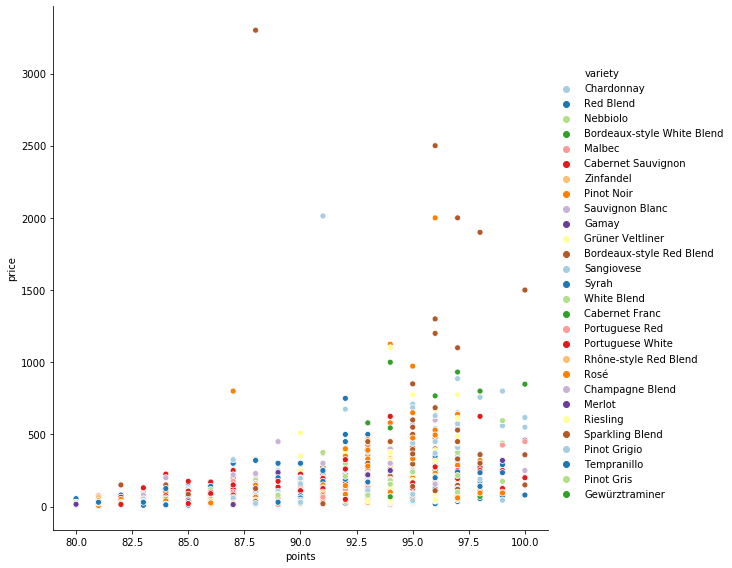

In [102]:
sb.relplot(x="points", y="price", hue="variety",data=dataframe,alpha=1,height=8,palette="Paired")

I also wanted to take a better look at how the two variable points and prices stack up against each other and does an increase in price lead to an increase in points. As we can see there is a general trend that as the price increases , the points wine has received do too. There are outliers in this data, but they could possibly be there due to insufficient information about the type of wine / noisy data.I first made a line plot to visualis ethis relation but then realised it was looking a little messy so the information is also displayed in the form of a much more neatly represented scatter plot.

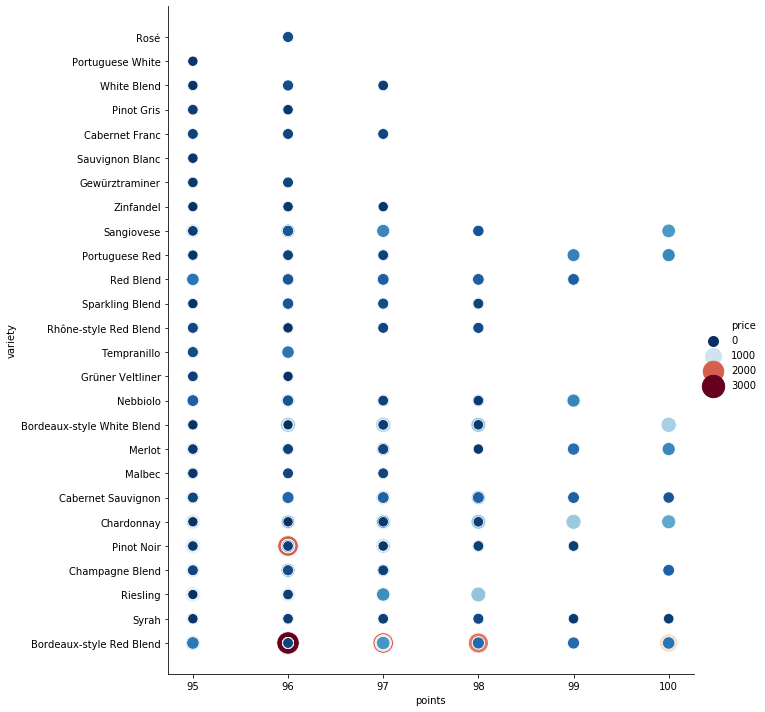

In [472]:
Subset1=dataframe[dataframe.points>=95]
g = sb.relplot(x="points", y="variety", hue="price",size="price",palette="RdBu_r",sizes=(100,500),alpha=1,height=10, data=Subset1)

I also created a relational plot with three dimensions, points , variety and price . I wanted to take a deeper look at the points and if the prices really affect them .I created a subset of the data with wines having more than 94 points and as we can see that an increase in price does not always mean that the wine receives a higher score , as wines even below the 1000 $ mark have receive a high score. 

# Modelling and wine predictions

Next moving on to wine classification and prediction , I decided to go with the H20.ai library instead of sklearn,because as i had previously mentioned that the data was filled with many categorical variable which would either have to be one hot encoded or vectorized before they could be used for the random forest model and gradient boosting classifier , i was planning to use. This problem is solved thanks to H20.ai whose random forest classifier and gradient boosting classifier libraries handle catrgorical variables on theri own without explicit need for data preparation prior to model training. 

In [2]:
import h2o
from h2o.estimators import H2ORandomForestEstimator 
h2o.init() 
WineDataTrain=h2o.import_file("C:/Users/Jivitesh Sharma/Desktop/Knight ML Assignment/Data/train.csv")
#WineDataTest=h2o.import_file("C:/Users/Jivitesh Sharma/Desktop/Knight ML Assignment/Data/test.csv")
WineDataTrain["variety"]=WineDataTrain["variety"].asfactor()
Features=["country","review_title","review_description","designation","points","price","province","region_1","region_2","winery"]
Target="variety"
train,valid=WineDataTrain.split_frame(ratios=[.8],seed=2)

drf = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibration_frame=valid,
                                    categorical_encoding="auto")
drf.train(x=Features,
              y=Target,training_frame=train,validation_frame=valid)

print(drf.model_performance(valid))
#drf.summary()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.7+8-LTS, mixed mode)
  Starting server from D:\anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\JIVITE~1\AppData\Local\Temp\tmpkxtte0o2
  JVM stdout: C:\Users\JIVITE~1\AppData\Local\Temp\tmpkxtte0o2\h2o_Jivitesh_Sharma_started_from_python.out
  JVM stderr: C:\Users\JIVITE~1\AppData\Local\Temp\tmpkxtte0o2\h2o_Jivitesh_Sharma_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_Jivitesh_Sharma_lmgg3t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.971 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.4591846800697683
RMSE: 0.6776316699135072
LogLoss: 1.4248115246221338
Mean Per-Class Error: 0.46110147874507457

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Gamay,GewÃ¼rztraminer,GrÃ¼ner Veltliner,Malbec,...,RosÃ©,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel,Error,Rate
0,831.0,2.0,4.0,177.0,0.0,24.0,0.0,0.0,0.0,20.0,...,2.0,0.0,2.0,0.0,52.0,1.0,1.0,7.0,0.287307,"335 / 1,166"
1,36.0,118.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.271605,44 / 162
2,2.0,0.0,38.0,52.0,0.0,14.0,0.0,0.0,0.0,10.0,...,0.0,0.0,1.0,0.0,27.0,1.0,1.0,7.0,0.816425,169 / 207
3,11.0,0.0,6.0,982.0,0.0,142.0,0.0,0.0,0.0,87.0,...,4.0,0.0,20.0,7.0,84.0,4.0,2.0,58.0,0.361508,"556 / 1,538"
4,0.0,0.0,0.0,5.0,215.0,7.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,8.0,0.0,0.0,0.0,1.0,0.133065,33 / 248
5,0.0,0.0,8.0,264.0,46.0,600.0,8.0,1.0,4.0,50.0,...,11.0,1.0,70.0,25.0,31.0,5.0,13.0,19.0,0.679829,"1,274 / 1,874"
6,0.0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.029940,5 / 167
7,1.0,0.0,1.0,13.0,0.0,4.0,0.0,16.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.901840,147 / 163
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,189.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.108491,23 / 212
9,3.0,0.0,0.0,70.0,0.0,7.0,0.0,0.0,0.0,325.0,...,2.0,0.0,3.0,2.0,17.0,1.0,0.0,7.0,0.276169,124 / 449



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.557876
1,2,0.722988
2,3,0.795221
3,4,0.842473
4,5,0.879131
5,6,0.904533
6,7,0.923373
7,8,0.939204
8,9,0.952989
9,10,0.961717


Above are the results of the random forest classifier as we can see the performance is not great (I split the training data into ,train and test sets to reduce overfitting) but it is not too bad either ,getting a mean squared error of 45.9 % and a mean per class error of 46.1%, but of course we can do better. I decided to use grid search for hyperparameter tuning , but this was taking extremely long time , and getting tedious . The code is attached below . If you have a lot of time and powerful machines, you can run it to get the best hyperparameters for the model .

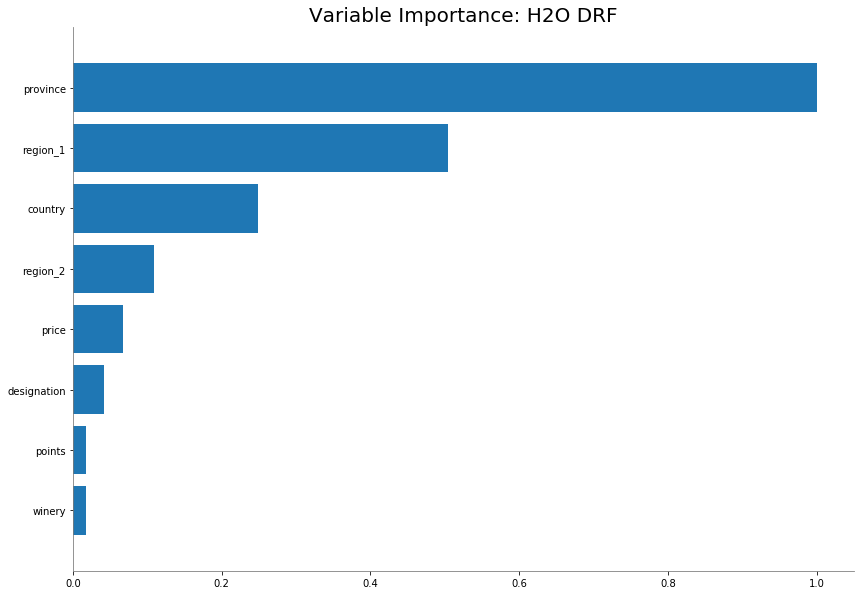


Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.546676
1,2,0.708702
2,3,0.780421
3,4,0.829881
4,5,0.864624
5,6,0.892559
6,7,0.913946
7,8,0.931677
8,9,0.945094
9,10,0.956369


In [64]:
drf.varimp_plot()
drf.hit_ratio_table()

I made a variable importance plot too for purposes of feature extraction and to take a look at if a few varibales could be dropped in our model for our testing data set later on.

In [58]:
from h2o.estimators import H2OGradientBoostingEstimator

gbm_model=H2OGradientBoostingEstimator(nfolds=5,
                                       ntrees=100,
                                        seed=1111,
                                        keep_cross_validation_predictions = True)

gbm_model.train(x=Features, y=Target, training_frame=train) 
Performance=gbm_model.model_performance(valid)
Performance


gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.3535576923355927
RMSE: 0.5946071748100528
LogLoss: 1.1785170578059092
Mean Per-Class Error: 0.374748619125254

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Gamay,GewÃ¼rztraminer,GrÃ¼ner Veltliner,Malbec,...,RosÃ©,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel,Error,Rate
0,913.0,22.0,2.0,90.0,0.0,8.0,0.0,0.0,0.0,16.0,...,2.0,0.0,2.0,2.0,25.0,1.0,3.0,4.0,0.216981,"253 / 1,166"
1,22.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.179012,29 / 162
2,6.0,0.0,68.0,51.0,0.0,7.0,0.0,1.0,0.0,7.0,...,2.0,2.0,3.0,0.0,12.0,5.0,2.0,3.0,0.671498,139 / 207
3,25.0,0.0,27.0,945.0,0.0,110.0,0.0,0.0,1.0,76.0,...,4.0,0.0,42.0,2.0,64.0,6.0,7.0,47.0,0.385566,"593 / 1,538"
4,0.0,0.0,0.0,1.0,219.0,5.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,13.0,0.0,0.0,1.0,2.0,0.116935,29 / 248
5,8.0,0.0,12.0,141.0,22.0,958.0,4.0,3.0,0.0,35.0,...,18.0,2.0,91.0,15.0,36.0,1.0,18.0,15.0,0.488794,"916 / 1,874"
6,0.0,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.011976,2 / 167
7,0.0,0.0,3.0,5.0,0.0,17.0,0.0,44.0,0.0,0.0,...,0.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.730061,119 / 163
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,185.0,0.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.127358,27 / 212
9,15.0,1.0,5.0,71.0,0.0,14.0,0.0,0.0,0.0,292.0,...,0.0,2.0,7.0,1.0,8.0,3.0,0.0,4.0,0.349666,157 / 449



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.630831
1,2,0.776019
2,3,0.846807
3,4,0.889725
4,5,0.915608
5,6,0.936616
6,7,0.951062
7,8,0.962860
8,9,0.972070
9,10,0.977728


The second model i wanted to test was a gradient boosting classifier, the results of which can be seen above. This performs significantly better than our random forest classifier, giving us a mean squared error of only 35.35% and a mean per class error of 37.4% . we also see that our log loss score has significantly reduced from 1.42 to 1.17. furthermore our hit ratios have also significantly improved - hit ratio is the number that represents the number of times the correct prediction was made in ratio to the total predictions. 

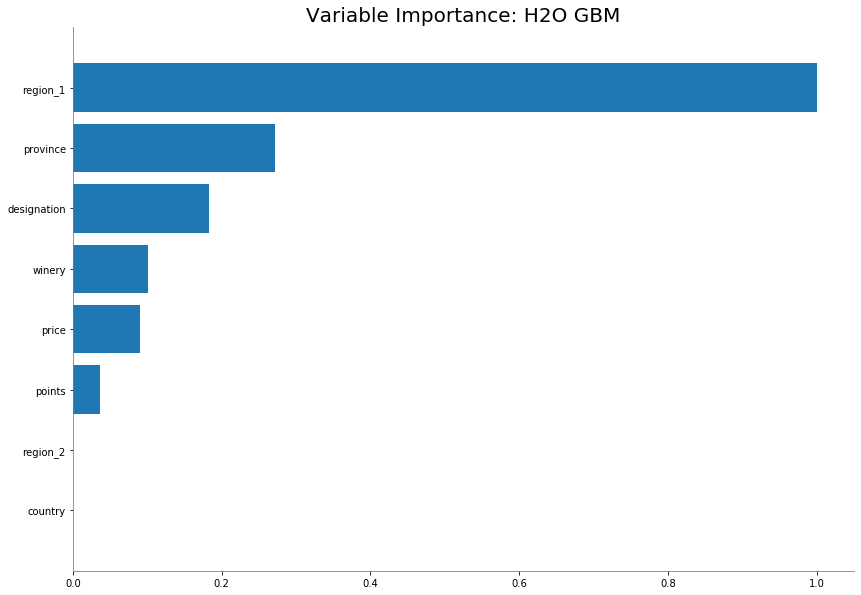

In [59]:
gbm_model.varimp_plot()

similarly i also made a variable importance plot for my gradient boosting classifier to see which variables could be dropped to reduce overhead when i run my model on the testing data set.

# Using Testing dataset

In [72]:
import h2o
from h2o.estimators import H2ORandomForestEstimator 
h2o.init() 
WineDataTrain=h2o.import_file("C:/Users/Jivitesh Sharma/Desktop/Knight ML Assignment/Data/train.csv")
WineDataTest=h2o.import_file("C:/Users/Jivitesh Sharma/Desktop/Knight ML Assignment/Data/test.csv")
WineDataTrainDropped=WineDataTrain.drop(["country","review_title","review_description","designation","points","price","province","region_1","region_2","winery"])

WineDataTrain["variety"]=WineDataTrain["variety"].asfactor()
Features=["country","review_title","review_description","designation","points","price","province","region_1","region_2","winery"]
Target="variety"

#train,valid=WineDataTrain.split_frame(ratios=[.8],seed=2)

drf2 = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibration_frame=WineDataTrain,
                                    categorical_encoding="auto")
drf2.train(x=Features,
              y=Target,training_frame=WineDataTrain,validation_frame=WineDataTrain)

print(drf2.model_performance())

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 34 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_Jivitesh_Sharma_lmgg3t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.380 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.45781220370730685
RMSE: 0.6766182111850869
LogLoss: 1.4548367993725784
Mean Per-Class Error: 0.46482958829709864

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Gamay,GewÃ¼rztraminer,GrÃ¼ner Veltliner,Malbec,...,RosÃ©,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel,Error,Rate
0,3848.0,29.0,17.0,743.0,0.0,74.0,0.0,0.0,2.0,74.0,...,10.0,2.0,20.0,8.0,224.0,3.0,7.0,27.0,0.294204,"1,604 / 5,452"
1,209.0,595.0,0.0,20.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.295024,249 / 844
2,30.0,0.0,169.0,281.0,0.0,99.0,0.0,0.0,0.0,51.0,...,4.0,2.0,25.0,6.0,105.0,7.0,1.0,30.0,0.843519,"911 / 1,080"
3,98.0,0.0,22.0,4881.0,0.0,396.0,0.0,1.0,3.0,429.0,...,18.0,2.0,143.0,26.0,354.0,15.0,8.0,232.0,0.347809,"2,603 / 7,484"
4,7.0,0.0,0.0,15.0,992.0,17.0,0.0,1.0,1.0,6.0,...,0.0,0.0,3.0,37.0,0.0,0.0,3.0,1.0,0.117438,"132 / 1,124"
5,55.0,0.0,49.0,1411.0,228.0,3009.0,15.0,17.0,32.0,219.0,...,44.0,0.0,369.0,143.0,177.0,22.0,45.0,109.0,0.677423,"6,319 / 9,328"
6,3.0,2.0,0.0,0.0,0.0,13.0,770.0,0.0,0.0,0.0,...,7.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.047030,38 / 808
7,2.0,0.0,2.0,50.0,0.0,48.0,0.0,41.0,5.0,1.0,...,2.0,1.0,9.0,0.0,5.0,1.0,1.0,7.0,0.950780,792 / 833
8,0.0,0.0,1.0,2.0,0.0,12.0,0.0,1.0,888.0,0.0,...,1.0,0.0,3.0,5.0,7.0,2.0,0.0,0.0,0.151862,"159 / 1,047"
9,25.0,2.0,4.0,304.0,0.0,17.0,0.0,0.0,0.0,1488.0,...,10.0,0.0,25.0,3.0,89.0,9.0,3.0,23.0,0.291766,"613 / 2,101"



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.553164
1,2,0.713028
2,3,0.788284
3,4,0.836510
4,5,0.870573
5,6,0.897689
6,7,0.918420
7,8,0.934157
8,9,0.947099
9,10,0.957488


Above are the results of the random forest classifier on the testing dataset and using features provided in train.csv which as we can see the performance is not great , but it is not too bad either , getting a mean squared error of 45.7 % and a mean per class error of 46.5%, but of course we can do better. I decided to use grid search for hyperparameter tuning , but this was taking extremely long time , and getting tedious . The code is attached below . If you have a lot of time and powerful machines, you can run it to get the best hyperparameters for the model .

In [75]:
from h2o.estimators import H2OGradientBoostingEstimator
Features_gbm_final=["review_title","review_description","designation","points","price","province","region_1","winery"]
gbm_model_final=H2OGradientBoostingEstimator(nfolds=5,
                                       ntrees=100,
                                        seed=1111,
                                        keep_cross_validation_predictions = True)

gbm_model_final.train(x=Features_gbm_final, y=Target, training_frame=WineDataTrain) 
Performance=gbm_model.model_performance()
Performance

gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.26567743289845325
RMSE: 0.515439068075416
LogLoss: 0.7888549141263875
Mean Per-Class Error: 0.2368613784047724

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Gamay,GewÃ¼rztraminer,GrÃ¼ner Veltliner,Malbec,...,RosÃ©,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel,Error,Rate
0,4724.0,31.0,3.0,326.0,0.0,23.0,0.0,0.0,0.0,52.0,...,12.0,0.0,19.0,0.0,76.0,1.0,5.0,22.0,0.140622,"773 / 5,497"
1,54.0,780.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.082353,70 / 850
2,24.0,0.0,559.0,199.0,0.0,29.0,0.0,6.0,0.0,27.0,...,4.0,5.0,16.0,1.0,47.0,6.0,2.0,24.0,0.489498,"536 / 1,095"
3,88.0,0.0,60.0,5536.0,0.0,387.0,0.0,0.0,0.0,314.0,...,10.0,2.0,195.0,0.0,179.0,11.0,7.0,144.0,0.266949,"2,016 / 7,552"
4,0.0,0.0,1.0,4.0,1095.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.033539,"38 / 1,133"
5,57.0,0.0,29.0,644.0,75.0,5997.0,3.0,14.0,8.0,148.0,...,24.0,5.0,309.0,39.0,90.0,6.0,33.0,72.0,0.362225,"3,406 / 9,403"
6,0.0,0.0,0.0,0.0,0.0,1.0,813.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.003676,3 / 816
7,0.0,0.0,18.0,13.0,0.0,49.0,0.0,507.0,0.0,1.0,...,3.0,0.0,13.0,1.0,3.0,1.0,0.0,3.0,0.396429,333 / 840
8,0.0,0.0,6.0,0.0,0.0,6.0,0.0,1.0,982.0,0.0,...,0.0,0.0,4.0,2.0,4.0,0.0,0.0,0.0,0.069194,"73 / 1,055"
9,25.0,0.0,22.0,218.0,0.0,30.0,0.0,0.0,0.0,1629.0,...,4.0,2.0,20.0,0.0,52.0,9.0,1.0,15.0,0.231241,"490 / 2,119"



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.752749
1,2,0.871203
2,3,0.919172
3,4,0.945824
4,5,0.963476
5,6,0.974666
6,7,0.981526
7,8,0.987454
8,9,0.991289
9,10,0.993866


The second model i tested was a gradient boosting classifer but this time i removed the variables country and regions to as they had no co-relation with the variety of the wine, the results of which can be viewed above This performs significantly better than our random forest classifier, giving us a mean squared error of only 26.6% and a mean per class error of 23.7% which surprisingly was better than the model trained and tested on the training dataset . we also see that our log loss score has significantly reduced from 1.45 to 0.78. furthermore our hit ratios have also significantly improved - hit ratio is the number that represents the number of times the correct prediction was made in ratio to the total predictions. 

In [79]:
''' 
from h2o.grid.grid_search import H2OGridSearch
gbm_params1 = {'learn_rate':[0.01, 0.02, 0.03],
    'max_depth':[4,8,16,24],
    'ntrees':[50, 250, 1000]}

gbm_grid1 = H2OGridSearch(model=gbm_model,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=Features, y=Target,
                training_frame=train,
                validation_frame=valid,
                seed=1) 
'''

" \nfrom h2o.grid.grid_search import H2OGridSearch\ngbm_params1 = {'learn_rate':[0.01, 0.02, 0.03],\n    'max_depth':[4,8,16,24],\n    'ntrees':[50, 250, 1000]}\n\ngbm_grid1 = H2OGridSearch(model=gbm_model,\n                          grid_id='gbm_grid1',\n                          hyper_params=gbm_params1)\ngbm_grid1.train(x=Features, y=Target,\n                training_frame=train,\n                validation_frame=valid,\n                seed=1) \n"

In [80]:
''' 
from h2o.grid.grid_search import H2OGridSearch

grid_search_drf=H2ORandomForestEstimator()

hyper_params={
             'ntrees':[10,100,],
              'max_depth':[5,20,],
              'sample_rate':[0.5,1],
              'categorical_encoding':["auto","enum","enum_limited","OneHotEncoding","binary","eigen","LabelEncoder"]
                 } 
grid=H2OGridSearch(grid_search_drf,hyper_params,grid_id='drf_grid1')
grid.train(x=Features,
              y=Target,training_frame=train,validation_frame=valid) 

grid_sorted = grid.get_grid(sort_by='auc',decreasing=True)
''' 

' \nfrom h2o.grid.grid_search import H2OGridSearch\n\ngrid_search_drf=H2ORandomForestEstimator()\n\nhyper_params={\n             \'ntrees\':[10,100,],\n              \'max_depth\':[5,20,],\n              \'sample_rate\':[0.5,1],\n              \'categorical_encoding\':["auto","enum","enum_limited","OneHotEncoding","binary","eigen","LabelEncoder"]\n                 } \ngrid=H2OGridSearch(grid_search_drf,hyper_params,grid_id=\'drf_grid1\')\ngrid.train(x=Features,\n              y=Target,training_frame=train,validation_frame=valid) \n\ngrid_sorted = grid.get_grid(sort_by=\'auc\',decreasing=True)\n'